In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=50_to_t=100_grid_32_c_1by32.npz')

In [3]:
data1.files

['dX_x', 'dX_y']

In [4]:
# combining the data
dX1 = data1['dX_x']
dX2 = data1['dX_y']

In [5]:
dX1.shape, dX2.shape # the data is for 500 time-steps

((250, 12417), (250, 12417))

In [7]:
dX = np.concatenate((dX1, dX2), axis=1)
dX.shape

(250, 24834)

In [8]:
from numpy import linalg as LA
from scipy import signal

In [9]:
Dt_c = 0.2 # time-step size for 64x64 grid
scaled_dX = dX*np.sqrt(Dt_c)

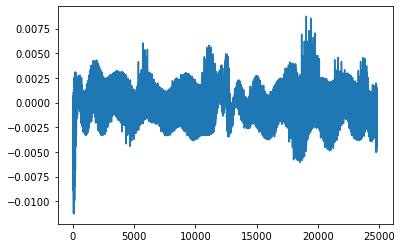

In [10]:
xi_0 = np.mean(scaled_dX, axis=0)
plt.plot(xi_0)

In [11]:
xi_0 = np.reshape(xi_0, (1, -1))
xi_0.shape

(1, 24834)

In [12]:
F = signal.detrend(scaled_dX, axis=0, type='constant')
F.shape

(250, 24834)

In [13]:
A, b, CT = LA.svd(F, full_matrices=False)

In [14]:
print(b) # variances of the EOFs 

[3.71326266e+00 2.64044451e+00 2.48757689e+00 2.32709202e+00
 2.07808481e+00 1.87645874e+00 1.68393510e+00 1.57645221e+00
 1.53925777e+00 1.37858642e+00 1.22482667e+00 1.22000542e+00
 1.19178665e+00 1.07381475e+00 9.74690162e-01 9.46940876e-01
 9.15196198e-01 8.63767967e-01 8.10885121e-01 8.04592720e-01
 7.84748100e-01 7.15072991e-01 6.96468887e-01 6.59491658e-01
 5.84081516e-01 5.46310132e-01 5.39168151e-01 5.18980369e-01
 4.88825634e-01 4.76579805e-01 4.63352868e-01 4.30652113e-01
 4.26647141e-01 4.03876462e-01 3.90458471e-01 3.80958819e-01
 3.76100878e-01 3.22411357e-01 3.06322211e-01 2.80121419e-01
 2.77131541e-01 2.70762773e-01 2.62595886e-01 2.61981388e-01
 2.41804955e-01 2.33663670e-01 2.23821904e-01 2.07443832e-01
 2.02947876e-01 1.99748732e-01 1.95166972e-01 1.92262776e-01
 1.76607322e-01 1.74160344e-01 1.64324279e-01 1.53840736e-01
 1.53156648e-01 1.46493553e-01 1.44546492e-01 1.33832188e-01
 1.20749008e-01 1.20023204e-01 1.17728932e-01 1.14220907e-01
 1.10424282e-01 1.063484

In [15]:
B = np.diag(b) # matrix containing variances

In [16]:
A.shape, B.shape, CT.shape

((250, 250), (250, 250), (250, 24834))

In [17]:
t_mat = np.matmul(A,B) # matrix containig time-series info
t_mat.shape

(250, 250)

In [18]:
xi_mat = CT # this matrix contain the EOFs

23 EOFs contain 90 percent of the total variance. Therefore we only extract this info from SVD of F

In [30]:
n_EOFs = 23

In [31]:
D = np.matmul(t_mat[:,:n_EOFs], xi_mat[:n_EOFs,:]) # info corresponding to 23 EOFs
t_mat[:,:n_EOFs].shape, xi_mat[:n_EOFs,:].shape, D.shape

((250, 23), (23, 24834), (250, 24834))

In [32]:
E = xi_0 + D # this should be approximately equal to matrix scaled_dX
# E = D #  not including the mean has very small effect on the final matrix
E.shape

(250, 24834)

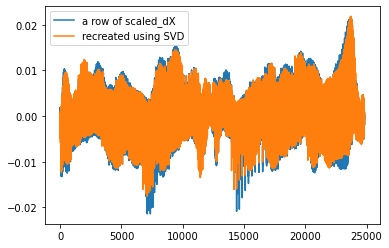

In [33]:
# rand_ele = int(np.random.uniform(0, 200))
rand_ele = 0
plt.plot(scaled_dX[rand_ele, :], label='a row of scaled_dX')
plt.plot(E[rand_ele,:], label='recreated using SVD')
plt.legend()

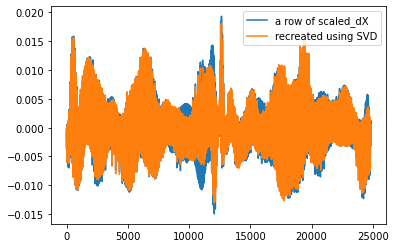

In [34]:
rand_ele = 200
plt.plot(scaled_dX[rand_ele, :], label='a row of scaled_dX')
plt.plot(E[rand_ele,:], label='recreated using SVD')
plt.legend()

In [35]:
combined_vec = E
detached_vec = np.zeros((combined_vec.shape[0],int(combined_vec.shape[1]/2),2))
for i in range(combined_vec.shape[0]):
    detached_vec[i,:,0] = combined_vec[i,:int(combined_vec.shape[1]/2)]
    detached_vec[i,:,1] = combined_vec[i,int(combined_vec.shape[1]/2):]
    
combined_vec.shape, detached_vec.shape

((250, 24834), (250, 12417, 2))

In [36]:
stoch_f_mat = detached_vec
stoch_f_mat.shape

(250, 12417, 2)

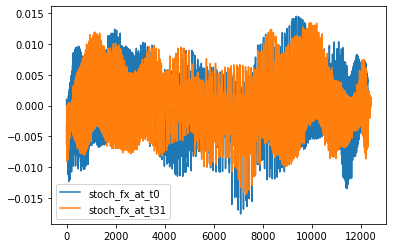

In [37]:
plt.plot(stoch_f_mat[0,:,0], label='stoch_fx_at_t0')
plt.plot(stoch_f_mat[31,:,0], label='stoch_fx_at_t31')
plt.legend()

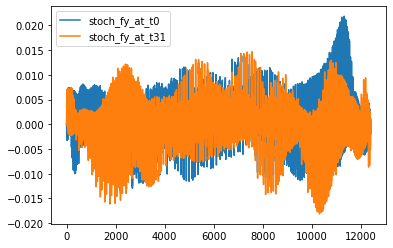

In [38]:
plt.plot(stoch_f_mat[0,:,1], label='stoch_fy_at_t0')
plt.plot(stoch_f_mat[31,:,1], label='stoch_fy_at_t31')
plt.legend()

In [40]:
data_file = './forcing/stochastic_forcing_as_deterministic_t50_to_t100_mesh32_var90.npz'

np.savez(data_file, stoch_f_mat = stoch_f_mat)